In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [3]:
# baca dataset yang sudah dilakukan praproses dari file csv
tweets_anies = pd.read_csv('../dataset/anies/Praproses-Anies-labeled.csv')
tweets_prabowo = pd.read_csv('../dataset/prabowo/praProses-Prabowo-done.csv')
tweet_ganjar = pd.read_csv('../dataset/ganjar/CLEANING1.csv')

df_anies = pd.DataFrame(tweets_anies[['tweet_tokens_stemmed','Sentimen']])
df_prabowo = pd.DataFrame(tweets_prabowo[['tweet_tokens_stemmed','Sentimen']])
df_ganjar = pd.DataFrame(tweet_ganjar[['tweet_tokens_stemmed','Sentimen']])

In [5]:
df_anies['Sentimen']
df_prabowo['Sentimen']
df_ganjar['Sentimen']

0      Negatif
1      Negatif
2       Netral
3      Positif
4      Positif
        ...   
715     Netral
716     Netral
717    Positif
718    Positif
719    Positif
Name: Sentimen, Length: 720, dtype: object

In [6]:
# encode label 
label_encoder = LabelEncoder()

# decode label    
def decodeLabel(polaritas):
    if polaritas == 2:
        return 'Positif'
    elif polaritas == 1:
        return 'Netral'
    else:
        return 'Negatif'

In [7]:
# encode label ganjar
# negatif = 0, netral = 1, positif = 2
df_ganjar['Sentimen_encoded'] = label_encoder.fit_transform(df_ganjar['Sentimen'])

# encode label Anies
# negatif = 0, netral = 1, positif = 2
df_anies['Sentimen_encoded'] = label_encoder.fit_transform(df_anies['Sentimen'])

# encode label Prabowo
# negatif = 0, netral = 1, positif = 2
df_prabowo['Sentimen_encoded'] = label_encoder.fit_transform(df_prabowo['Sentimen'])


In [8]:
# balancing dataset ganjar
s_1_ganjar = df_ganjar[df_ganjar['Sentimen_encoded']==0].sample(200,replace=True)
s_2_ganjar = df_ganjar[df_ganjar['Sentimen_encoded']==1].sample(200,replace=True)
s_3_ganjar = df_ganjar[df_ganjar['Sentimen_encoded']==2].sample(300,replace=True)
df_ganjar = pd.concat([s_1_ganjar, s_2_ganjar, s_3_ganjar])

print(df_ganjar.shape)
print(df_ganjar['Sentimen_encoded'].value_counts())

(700, 3)
2    300
0    200
1    200
Name: Sentimen_encoded, dtype: int64


In [9]:
# balancing dataset anies
s_1_anies = df_anies[df_anies['Sentimen_encoded']==0].sample(200,replace=True)
s_2_anies  = df_anies[df_anies['Sentimen_encoded']==1].sample(200,replace=True)
s_3_anies  = df_anies[df_anies['Sentimen_encoded']==2].sample(300,replace=True)
df_anies = pd.concat([s_1_anies, s_2_anies, s_3_anies])

print(df_anies.shape)
print(df_anies['Sentimen_encoded'].value_counts())

(700, 3)
2    300
0    200
1    200
Name: Sentimen_encoded, dtype: int64


In [11]:
# balancing dataset prabowo
s_1_prabowo = df_prabowo[df_prabowo['Sentimen_encoded']==0].sample(200,replace=True)
s_2_prabowo = df_prabowo[df_prabowo['Sentimen_encoded']==1].sample(200,replace=True)
s_3_prabowo = df_prabowo[df_prabowo['Sentimen_encoded']==2].sample(300,replace=True)
df_prabowo = pd.concat([s_1_prabowo, s_2_prabowo, s_3_prabowo])

print(df_prabowo.shape)
print(df_prabowo['Sentimen_encoded'].value_counts())

(700, 3)
2    300
0    200
1    200
Name: Sentimen_encoded, dtype: int64


In [12]:
# init data training dan data testing Ganjar
X_ganjar = df_ganjar['tweet_tokens_stemmed']
y_ganjar = df_ganjar['Sentimen_encoded']
print(df_ganjar['Sentimen_encoded'].size)

700


In [13]:
# init data training dan data testing Anies
X_anies = df_anies['tweet_tokens_stemmed']
y_anies = df_anies['Sentimen_encoded']
print(df_anies['Sentimen_encoded'].size)

700


In [14]:
# init data training dan data testing Prabowo
X_prabowo= df_prabowo['tweet_tokens_stemmed']
y_prabowo = df_prabowo['Sentimen_encoded']
print(df_prabowo['Sentimen_encoded'].size)

700


In [16]:
# split data training dan data testing dataset ganjar
X_train_ganjar, X_test_ganjar, y_train_ganjar, y_test_ganjar = train_test_split(X_ganjar,
                                                                                y_ganjar, test_size=0.3, random_state=1)

In [17]:
# split data training dan data testing dataset anies
X_train_anies, X_test_anies, y_train_anies, y_test_anies = train_test_split(X_anies, 
                                                                            y_anies, test_size=0.3, random_state=1)

In [19]:
# split data training dan data testing dataset prabowo
X_train_prabowo, X_test_prabowo, y_train_prabowo, y_test_prabowo = train_test_split(X_prabowo, 
                                                                                    y_prabowo, test_size=0.3, random_state=1)

In [20]:
# instansiasi objek TFIDF
vectorizer = TfidfVectorizer(analyzer='word', max_features=300, max_df=0.5, use_idf=True, norm='l2')

In [23]:
# proses mengubah dataset ganjar text menjadi TF-IDF
tfidf_ganjar = vectorizer.fit_transform(X_train_ganjar)
X_test_tf_ganjar = vectorizer.transform(X_test_ganjar)

In [24]:
# proses mengubah dataset anies text menjadi TF-IDF
tfidf_anies = vectorizer.fit_transform(X_train_anies)
X_test_tf_anies = vectorizer.transform(X_test_anies)

In [25]:
# proses mengubah dataset prabowo text menjadi TF-IDF
tfidf_prabowo = vectorizer.fit_transform(X_train_prabowo)
X_test_tf_prabowo = vectorizer.transform(X_test_prabowo)

In [30]:
print(X_train_anies.size)
print(X_test_anies)

490
678    ['mantap', 'partai', 'moga', 'rekomendasi', 'c...
299    ['majelis', 'syura', 'kader', 'pks', 'anies', ...
554    ['sosok', 'gubernur', 'dki', 'jakarta', 'anies...
487    ['asmara', 'suasana', 'sambut', 'anies', 'basw...
569    ['rakernas', 'nasdem', 'rekomendasi', 'anies',...
                             ...                        
392              ['kacau', 'waduuuh', 'kasi', 'beneran']
123    ['prediksi', 'sosiolog', 'pilih', 'anies', 'pa...
725    ['kurus', 'nama', 'terbilih', 'capres', 'raker...
180    ['pks', 'gelar', 'temu', 'partai', 'nasdem', '...
639    ['angkat', 'berita', 'kejangkejang', 'buzzer',...
Name: tweet_tokens_stemmed, Length: 210, dtype: object


In [31]:
print(X_train_ganjar.size)
print(X_test_ganjar)

490
442              ['asyek', 'asyek', 'njih', 'indonesia']
169    ['akhirnyatujuan', 'negara', 'sejahtera', 'adi...
337                                   ['tua', 'ganteng']
636                                            ['mesti']
94     ['caprescawapres', 'indonesia', 'sehat', 'akal...
                             ...                        
381    ['gemar', 'balap', 'indonesia', 'balap', 'sepi...
387                                   ['idola', 'idola']
332    ['himpun', 'lora', 'madura', 'hilma', 'ulama',...
678    ['jiwa', 'nasionalis', 'bakti', 'nasional', 'l...
126    ['suka', 'demo', 'presiden', 'denny', 'sumargo...
Name: tweet_tokens_stemmed, Length: 210, dtype: object


In [32]:
print(X_train_prabowo.size)
print(X_test_prabowo)

490
566    ['bmalming', 'bareng', 'gus', 'muhaimin', 'pra...
117    ['sumsel', 'benar', 'yakin', 'rakyat', 'menhan...
323                      ['pasang', 'pilpres', 'bicara']
395                   ['kolaborasi', 'riang', 'gembira']
98                                  ['menteri', 'tahan']
                             ...                        
410              ['kayak', 'berat', 'prabowo', 'pasang']
590    ['pkb', 'mantafs', 'nasionalis', 'islami', 'ke...
332         ['pkb', 'gasss', 'insya', 'alloh', 'berkah']
142    ['fren', 'publik', 'mantap', 'kukuh', 'pilih',...
204    ['bnasihat', 'bahwa', 'tenggelam', 'gandeng', ...
Name: tweet_tokens_stemmed, Length: 210, dtype: object


In [33]:
# training backpropagation dataset ganjar
learning_rate = 0.001
hidden_layer = (130,130)
epoch = 300
model_ganjar = MLPClassifier(hidden_layer_sizes=hidden_layer, max_iter=epoch, n_iter_no_change=300,
                            learning_rate_init = learning_rate,activation='relu', solver='adam', verbose=True)
model_ganjar.fit(tfidf_ganjar, y_train_ganjar)

Iteration 1, loss = 1.09990577
Iteration 2, loss = 1.07628458
Iteration 3, loss = 1.05907655
Iteration 4, loss = 1.04604673
Iteration 5, loss = 1.03254566
Iteration 6, loss = 1.01731646
Iteration 7, loss = 0.99761076
Iteration 8, loss = 0.97581817
Iteration 9, loss = 0.94972366
Iteration 10, loss = 0.91975663
Iteration 11, loss = 0.88455566
Iteration 12, loss = 0.84494896
Iteration 13, loss = 0.80116291
Iteration 14, loss = 0.75358739
Iteration 15, loss = 0.70389435
Iteration 16, loss = 0.65294402
Iteration 17, loss = 0.60314904
Iteration 18, loss = 0.55199783
Iteration 19, loss = 0.50559667
Iteration 20, loss = 0.46178343
Iteration 21, loss = 0.42079929
Iteration 22, loss = 0.38386708
Iteration 23, loss = 0.35087649
Iteration 24, loss = 0.32054992
Iteration 25, loss = 0.29581155
Iteration 26, loss = 0.27330774
Iteration 27, loss = 0.25396849
Iteration 28, loss = 0.23834252
Iteration 29, loss = 0.22283991
Iteration 30, loss = 0.21080301
Iteration 31, loss = 0.19991615
Iteration 32, los

Iteration 254, loss = 0.10197825
Iteration 255, loss = 0.10144347
Iteration 256, loss = 0.10157019
Iteration 257, loss = 0.10217314
Iteration 258, loss = 0.10168064
Iteration 259, loss = 0.10120024
Iteration 260, loss = 0.10124212
Iteration 261, loss = 0.10258823
Iteration 262, loss = 0.10167863
Iteration 263, loss = 0.10133482
Iteration 264, loss = 0.10135842
Iteration 265, loss = 0.10286151
Iteration 266, loss = 0.10305200
Iteration 267, loss = 0.10221594
Iteration 268, loss = 0.10077396
Iteration 269, loss = 0.10189267
Iteration 270, loss = 0.10390628
Iteration 271, loss = 0.10331895
Iteration 272, loss = 0.10170233
Iteration 273, loss = 0.10133222
Iteration 274, loss = 0.10152218
Iteration 275, loss = 0.10171774
Iteration 276, loss = 0.10186901
Iteration 277, loss = 0.10125737
Iteration 278, loss = 0.10074021
Iteration 279, loss = 0.10158569
Iteration 280, loss = 0.10211742
Iteration 281, loss = 0.10096223
Iteration 282, loss = 0.10148635
Iteration 283, loss = 0.10115078
Iteration 

C:\Users\yusuf\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(130, 130), max_iter=300, n_iter_no_change=300,
              verbose=True)

In [34]:
# training backpropagation dataset anies
learning_rate = 0.001
hidden_layer = (130,130)
epoch = 300
model_anies = MLPClassifier(hidden_layer_sizes=hidden_layer, max_iter=epoch, n_iter_no_change=300,
                            learning_rate_init = learning_rate,activation='relu', solver='adam', verbose=True)
model_anies.fit(tfidf_anies, y_train_anies)

Iteration 1, loss = 1.13201923
Iteration 2, loss = 1.09007006
Iteration 3, loss = 1.05839252
Iteration 4, loss = 1.03128051
Iteration 5, loss = 1.00869828
Iteration 6, loss = 0.98153525
Iteration 7, loss = 0.95118100
Iteration 8, loss = 0.91451921
Iteration 9, loss = 0.87201177
Iteration 10, loss = 0.82532606
Iteration 11, loss = 0.77495938
Iteration 12, loss = 0.72009763
Iteration 13, loss = 0.66578469
Iteration 14, loss = 0.61164341
Iteration 15, loss = 0.55702328
Iteration 16, loss = 0.50800646
Iteration 17, loss = 0.46237838
Iteration 18, loss = 0.42082969
Iteration 19, loss = 0.38451607
Iteration 20, loss = 0.35156883
Iteration 21, loss = 0.32115605
Iteration 22, loss = 0.29522761
Iteration 23, loss = 0.27203989
Iteration 24, loss = 0.24948276
Iteration 25, loss = 0.23025866
Iteration 26, loss = 0.21288398
Iteration 27, loss = 0.19697740
Iteration 28, loss = 0.18311664
Iteration 29, loss = 0.17021506
Iteration 30, loss = 0.15831361
Iteration 31, loss = 0.14795155
Iteration 32, los

Iteration 257, loss = 0.03175917
Iteration 258, loss = 0.03144431
Iteration 259, loss = 0.03123286
Iteration 260, loss = 0.03097522
Iteration 261, loss = 0.03080952
Iteration 262, loss = 0.03064447
Iteration 263, loss = 0.03110978
Iteration 264, loss = 0.03063575
Iteration 265, loss = 0.03092981
Iteration 266, loss = 0.03081562
Iteration 267, loss = 0.03027306
Iteration 268, loss = 0.03146743
Iteration 269, loss = 0.03156173
Iteration 270, loss = 0.03090980
Iteration 271, loss = 0.03074608
Iteration 272, loss = 0.03133593
Iteration 273, loss = 0.03178601
Iteration 274, loss = 0.03068065
Iteration 275, loss = 0.03092590
Iteration 276, loss = 0.03157797
Iteration 277, loss = 0.03121163
Iteration 278, loss = 0.03095310
Iteration 279, loss = 0.03049362
Iteration 280, loss = 0.03066488
Iteration 281, loss = 0.03080972
Iteration 282, loss = 0.03089717
Iteration 283, loss = 0.03207243
Iteration 284, loss = 0.03138789
Iteration 285, loss = 0.03009640
Iteration 286, loss = 0.03282216
Iteration 

C:\Users\yusuf\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(130, 130), max_iter=300, n_iter_no_change=300,
              verbose=True)

In [35]:
# training backpropagation dataset prabowo
learning_rate = 0.001
hidden_layer = (130,130)
epoch = 300
model_prabowo = MLPClassifier(hidden_layer_sizes=hidden_layer, max_iter = epoch, n_iter_no_change=300,
                              learning_rate_init = learning_rate, activation='relu', solver='adam', verbose=True)
model_prabowo.fit(tfidf_prabowo, y_train_prabowo)

Iteration 1, loss = 1.11705434
Iteration 2, loss = 1.07865697
Iteration 3, loss = 1.05152972
Iteration 4, loss = 1.02865852
Iteration 5, loss = 1.00714024
Iteration 6, loss = 0.98052164
Iteration 7, loss = 0.95016209
Iteration 8, loss = 0.91330321
Iteration 9, loss = 0.87108311
Iteration 10, loss = 0.82272193
Iteration 11, loss = 0.76999100
Iteration 12, loss = 0.71089995
Iteration 13, loss = 0.65011996
Iteration 14, loss = 0.58603862
Iteration 15, loss = 0.52351148
Iteration 16, loss = 0.46470841
Iteration 17, loss = 0.40957831
Iteration 18, loss = 0.36308712
Iteration 19, loss = 0.32171403
Iteration 20, loss = 0.28805920
Iteration 21, loss = 0.25872436
Iteration 22, loss = 0.23354480
Iteration 23, loss = 0.21242403
Iteration 24, loss = 0.19490381
Iteration 25, loss = 0.17903822
Iteration 26, loss = 0.16560429
Iteration 27, loss = 0.15352149
Iteration 28, loss = 0.14305975
Iteration 29, loss = 0.13380314
Iteration 30, loss = 0.12566181
Iteration 31, loss = 0.11836496
Iteration 32, los

Iteration 266, loss = 0.05833571
Iteration 267, loss = 0.05811206
Iteration 268, loss = 0.05848793
Iteration 269, loss = 0.05858861
Iteration 270, loss = 0.05789382
Iteration 271, loss = 0.05850585
Iteration 272, loss = 0.05878139
Iteration 273, loss = 0.05876126
Iteration 274, loss = 0.05832115
Iteration 275, loss = 0.05836822
Iteration 276, loss = 0.05830825
Iteration 277, loss = 0.05793674
Iteration 278, loss = 0.05844999
Iteration 279, loss = 0.05841443
Iteration 280, loss = 0.05853623
Iteration 281, loss = 0.05870761
Iteration 282, loss = 0.05914118
Iteration 283, loss = 0.05862332
Iteration 284, loss = 0.05834776
Iteration 285, loss = 0.05845325
Iteration 286, loss = 0.05836529
Iteration 287, loss = 0.05853973
Iteration 288, loss = 0.05828883
Iteration 289, loss = 0.05826079
Iteration 290, loss = 0.05826289
Iteration 291, loss = 0.05818909
Iteration 292, loss = 0.05831305
Iteration 293, loss = 0.05816885
Iteration 294, loss = 0.05820311
Iteration 295, loss = 0.05836868
Iteration 

C:\Users\yusuf\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(130, 130), max_iter=300, n_iter_no_change=300,
              verbose=True)

In [36]:
print(model_anies.score(tfidf_anies, y_train_anies))
print(model_anies.score(X_test_tf_anies, y_test_anies))

0.9857142857142858
0.8047619047619048


In [37]:
print(model_ganjar.score(tfidf_ganjar, y_train_ganjar))
print(model_ganjar.score(X_test_tf_ganjar, y_test_ganjar))

0.9448979591836735
0.7238095238095238


In [38]:
print(model_prabowo.score(tfidf_prabowo, y_train_prabowo))
print(model_prabowo.score(X_test_tf_prabowo, y_test_prabowo))

0.9734693877551021
0.9285714285714286


In [39]:
# init confusion matrix ganjar
result_ganjar = model_ganjar.predict(X_test_tf_ganjar)
matrix_ganjar = confusion_matrix(y_test_ganjar, result_ganjar)
print(matrix_ganjar)
print(classification_report(y_test_ganjar, result_ganjar))
print(result_ganjar.size)
print(y_test_ganjar.size)

[[45  8 12]
 [ 9 36  7]
 [11 11 71]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        65
           1       0.65      0.69      0.67        52
           2       0.79      0.76      0.78        93

    accuracy                           0.72       210
   macro avg       0.71      0.72      0.71       210
weighted avg       0.73      0.72      0.72       210

210
210


In [40]:
# init confusion matrix anies 
result_anies = model_anies.predict(X_test_tf_anies)
matrix_anies = confusion_matrix(y_test_anies, result_anies)
print(matrix_anies)
print(classification_report(y_test_anies, result_anies))
print(result_anies.size)
print(y_test_anies.size)

[[58  2  5]
 [ 3 41  8]
 [ 6 17 70]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        65
           1       0.68      0.79      0.73        52
           2       0.84      0.75      0.80        93

    accuracy                           0.80       210
   macro avg       0.80      0.81      0.80       210
weighted avg       0.81      0.80      0.81       210

210
210


In [41]:
# init confusion matrix prabowo 
result_prabowo = model_prabowo.predict(X_test_tf_prabowo)
matrix_prabowo = confusion_matrix(y_test_prabowo, result_prabowo)
print(matrix_prabowo)
print(classification_report(y_test_prabowo, result_prabowo))
print(result_prabowo.size)
print(y_test_prabowo.size)

[[56  7  2]
 [ 2 47  3]
 [ 1  0 92]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        65
           1       0.87      0.90      0.89        52
           2       0.95      0.99      0.97        93

    accuracy                           0.93       210
   macro avg       0.92      0.92      0.92       210
weighted avg       0.93      0.93      0.93       210

210
210


In [42]:
# prediksi anies
pred_anies = model_anies.predict(X_test_tf_anies)
pred_anies

array([2, 2, 1, 0, 1, 2, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 0,
       1, 1, 0, 1, 2, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 0, 1, 1, 1, 2, 0, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 0, 2, 0, 2, 0, 0, 2, 1, 2, 1, 0, 1,
       0, 2, 0, 2, 2, 0, 1, 0, 2, 2, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 2, 2,
       1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 0, 1, 0, 2, 2, 0, 2, 0, 1, 1, 0,
       2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 2,
       2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0, 2, 1, 2, 0, 1,
       1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 0])

In [43]:
# Prediksi ganjar
pred_ganjar = model_ganjar.predict(X_test_tf_ganjar)
pred_ganjar

array([0, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 1, 2, 1, 0,
       1, 2, 0, 1, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 1,
       2, 0, 2, 0, 0, 2, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 1, 2, 2, 2, 0, 2,
       0, 2, 1, 2, 1, 0, 1, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 1,
       1, 2, 2, 1, 2, 1, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 1, 2, 0, 0, 2, 0,
       2, 0, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 1,
       2, 0, 1, 2, 1, 2, 2, 0, 0, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0])

In [44]:
# Prediksi prabowo
pred_prabowo = model_prabowo.predict(X_test_tf_prabowo)
pred_prabowo

array([2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2,
       2, 1, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 1, 2, 2, 0, 0, 2, 2, 0,
       1, 1, 0, 1, 2, 2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 1, 2, 1, 1, 0, 1,
       2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 0, 2,
       1, 2, 1, 2, 2, 0, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 2, 0, 2, 0, 2, 1,
       1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 0, 0, 1, 0, 2, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 1, 1, 0, 2,
       2, 0, 1, 2, 1, 2, 2, 2, 0, 0, 1, 1, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0,
       1, 2, 2, 1, 0, 2, 2, 1, 0, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0])

In [45]:
# inisialisasi data frame dari hasil prediksi anies
prediction_anies = pd.DataFrame({'Tweet':X_test_anies,'prediksi_anies': pred_anies})
prediction_anies['prediksi_anies'] = prediction_anies['prediksi_anies'].apply(decodeLabel) 
prediction_anies

Tweet prediksi_anies
678  ['mantap', 'partai', 'moga', 'rekomendasi', 'c...        Positif
299  ['majelis', 'syura', 'kader', 'pks', 'anies', ...        Positif
554  ['sosok', 'gubernur', 'dki', 'jakarta', 'anies...         Netral
487  ['asmara', 'suasana', 'sambut', 'anies', 'basw...        Negatif
569  ['rakernas', 'nasdem', 'rekomendasi', 'anies',...         Netral
..                                                 ...            ...
392            ['kacau', 'waduuuh', 'kasi', 'beneran']        Negatif
123  ['prediksi', 'sosiolog', 'pilih', 'anies', 'pa...        Positif
725  ['kurus', 'nama', 'terbilih', 'capres', 'raker...         Netral
180  ['pks', 'gelar', 'temu', 'partai', 'nasdem', '...        Positif
639  ['angkat', 'berita', 'kejangkejang', 'buzzer',...        Negatif

[210 rows x 2 columns]

In [46]:
# inisialisasi dataframe dari hasil prediksi ganjar
prediction_ganjar = pd.DataFrame({'Tweet':X_test_ganjar,'prediksi_ganjar': pred_ganjar})
prediction_ganjar['prediksi_ganjar'] = prediction_ganjar['prediksi_ganjar'].apply(decodeLabel) 
prediction_ganjar

Tweet prediksi_ganjar
442            ['asyek', 'asyek', 'njih', 'indonesia']         Negatif
169  ['akhirnyatujuan', 'negara', 'sejahtera', 'adi...          Netral
337                                 ['tua', 'ganteng']          Netral
636                                          ['mesti']         Positif
94   ['caprescawapres', 'indonesia', 'sehat', 'akal...          Netral
..                                                 ...             ...
381  ['gemar', 'balap', 'indonesia', 'balap', 'sepi...         Negatif
387                                 ['idola', 'idola']         Positif
332  ['himpun', 'lora', 'madura', 'hilma', 'ulama',...         Positif
678  ['jiwa', 'nasionalis', 'bakti', 'nasional', 'l...         Positif
126  ['suka', 'demo', 'presiden', 'denny', 'sumargo...         Negatif

[210 rows x 2 columns]

In [47]:
# inisialisasi dataframe dari hasil prediksi prabowo
prediction_prabowo = pd.DataFrame({'Tweet':X_test_prabowo,'prediksi_prabowo': pred_prabowo})
prediction_prabowo['prediksi_prabowo'] = prediction_prabowo['prediksi_prabowo'].apply(decodeLabel) 
prediction_prabowo

Tweet prediksi_prabowo
566  ['bmalming', 'bareng', 'gus', 'muhaimin', 'pra...          Positif
117  ['sumsel', 'benar', 'yakin', 'rakyat', 'menhan...          Positif
323                    ['pasang', 'pilpres', 'bicara']           Netral
395                 ['kolaborasi', 'riang', 'gembira']          Positif
98                                ['menteri', 'tahan']           Netral
..                                                 ...              ...
410            ['kayak', 'berat', 'prabowo', 'pasang']          Negatif
590  ['pkb', 'mantafs', 'nasionalis', 'islami', 'ke...          Positif
332       ['pkb', 'gasss', 'insya', 'alloh', 'berkah']          Positif
142  ['fren', 'publik', 'mantap', 'kukuh', 'pilih',...          Positif
204  ['bnasihat', 'bahwa', 'tenggelam', 'gandeng', ...          Negatif

[210 rows x 2 columns]

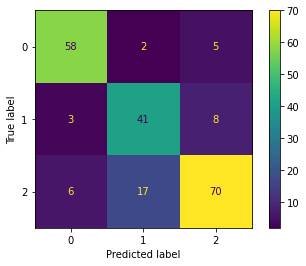

In [48]:
# display hasil dari confusion matrix anies
disp_anies = ConfusionMatrixDisplay(confusion_matrix=matrix_anies,
                              display_labels=model_anies.classes_)
disp_anies.plot()
plt.show()

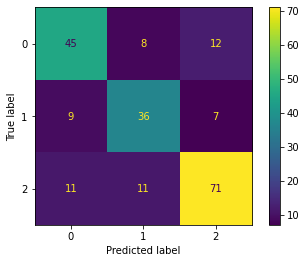

In [49]:
# display hasil dari confusion matrix ganjar
disp_ganjar = ConfusionMatrixDisplay(confusion_matrix=matrix_ganjar,
                              display_labels=model_ganjar.classes_)
disp_ganjar.plot()
plt.show()

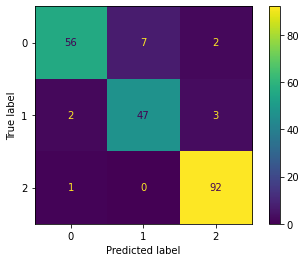

In [50]:
# display hasil dari confusion matrix prabowo
disp_prabowo = ConfusionMatrixDisplay(confusion_matrix=matrix_prabowo,
                              display_labels=model_prabowo.classes_)
disp_prabowo.plot()
plt.show()

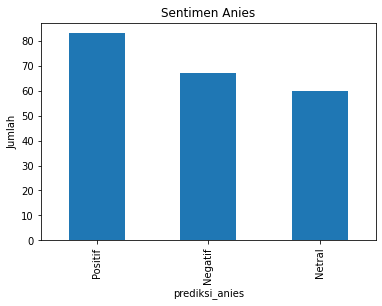

In [52]:
# bar diagram prediksi anies
getTotal = prediction_anies.value_counts('prediksi_anies')

plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Sentimen Anies')
prediction_anies.value_counts('prediksi_anies').plot.bar()
plt.show()


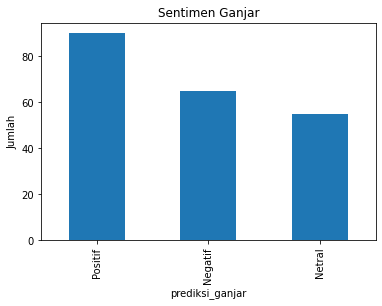

In [53]:
# bar diagram prediksi anies
getTotal_ganjar = prediction_ganjar.value_counts('prediksi_ganjar')

plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Sentimen Ganjar')
prediction_ganjar.value_counts('prediksi_ganjar').plot.bar()
plt.show()

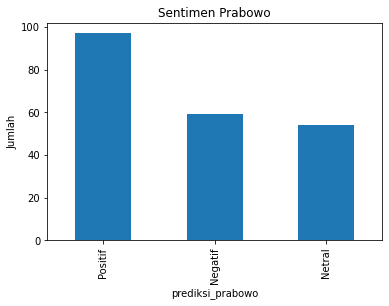

In [54]:
# bar diagram prediksi anies
getTotal_prabowo = prediction_prabowo.value_counts('prediksi_prabowo')

plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Sentimen Prabowo')
prediction_prabowo.value_counts('prediksi_prabowo').plot.bar()
plt.show()

In [55]:
# import joblib
import joblib

# import model dengan joblib

In [56]:
# save model BPPN anies
filename_anies = 'model/anies/anies_model_acc_82%.pkl'
joblib.dump(model_anies, filename_anies)

file1_anies = 'model/anies/X_test_tf_anies.pkl'
file2_anies = 'model/anies/y_test_anies.pkl'

joblib.dump(X_test_tf_anies, file1_anies)
joblib.dump(y_test_anies, file2_anies)

['model/anies/y_test_anies.pkl']

In [58]:
# save model BPPN prabowo
filename = 'model/prabowo/prabowo_model_acc82%.pkl'
joblib.dump(model_prabowo, filename)

file1_prabowo = 'model/prabowo/X_test_tf_prabowo.pkl'
file2_prabowo = 'model/prabowo/y_test_anies.pkl'

joblib.dump(X_test_tf_prabowo, file1_prabowo)
joblib.dump(y_test_prabowo, file2_prabowo)

['model/prabowo/y_test_anies.pkl']

In [57]:
# save model BPPN ganjar
filename = 'model/ganjar/ganjar_model_valid__acc82%.pkl'
joblib.dump(model_ganjar, filename)

file1_ganjar = 'model/ganjar/X_test_tf_ganjar.pkl'
file2_ganjar = 'model/ganjar/y_test_ganjar.pkl'

joblib.dump(X_test_tf_ganjar, file1_ganjar)
joblib.dump(y_test_ganjar, file2_ganjar)

['model/ganjar/y_test_ganjar.pkl']